In [1]:
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

master = pds.read_csv('basketball_master.csv')
master.head(5)

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
1,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
2,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,G,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
3,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,G,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B
4,abdulta01,Tariq,Tariq,NaN,Abdul-Wahad,NaN,Olivier Michael Saint-Jean,NaN,NaN,G-F,...,1974-11-03,Maisons Alfort,NaN,FRA,Lycee Aristide Briand,Evreux,NaN,FRA,0000-00-00,B


#### Merging the firstname and lastname column together to give the fullname column

In [2]:
master["fullName"] = master[["firstName", "lastName"]].apply(lambda a : "{}  {}".format(a[0], a[1]), axis=1)

#### Moving the newly created fullname column to the second column

In [3]:
master = pds.concat([master.iloc[:,0], master.iloc[:,-1], master.iloc[:,1:-1]], axis = 1)
master.birthDate.tail()

5056    NaN
5057    NaN
5058    NaN
5059    NaN
5060    NaN
Name: birthDate, dtype: object

#### Filling empty birthDate cells with "0000-00-00" so as to classify as unknown

In [4]:
master.birthDate = master.birthDate.fillna(master.iloc[3713,:].birthDate)
master.head()

,bioID,fullName,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,abdelal01,Alaa Abdelnaby,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
1,abdulka01,Kareem Abdul-Jabbar,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
2,abdulma01,Mahdi Abdul-Rahman,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
3,abdulma02,Mahmoud Abdul-Rauf,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B
4,abdulta01,Tariq Abdul-Wahad,Tariq,Tariq,NaN,Abdul-Wahad,NaN,Olivier Michael Saint-Jean,NaN,NaN,...,1974-11-03,Maisons Alfort,NaN,FRA,Lycee Aristide Briand,Evreux,NaN,FRA,0000-00-00,B


#### Splitting the birthDate into year, month and day
#### Creating a dataframe with the new columns
#### Merging the new dataframe together with the fullname column
#### Converting the column "year" into "int" datatype

In [6]:
birth_year = master["birthDate"].str.split('-', expand=True)
birth_year.columns = pds.Series(["year", "month", "day"])

birth_year = pds.concat([master.fullName, birth_year], axis=1)
birth_year.year = birth_year["year"].astype(int)
birth_year.isnull().sum()

fullName    0
year        0
month       0
day         0
dtype: int64

#### Write a function to group the years into a grouped data with class width "10"

In [7]:
def classData(iniFrame, uc):
    obtFrame = iniFrame[(iniFrame["year"] < uc)]
    finalFrame = iniFrame.drop(obtFrame.index)
    return obtFrame.year.count(), finalFrame

In [51]:
dummyY = ["ok"]
dummyV = ["ok"]
for i in list(range(0,11)):
    if i == 0:
        iniFrame = birth_year
        accept, finalFrame = classData(iniFrame, 1)
        dummyY.append("unknown")
        dummyV.append(accept)
    else:
        iniFrame = finalFrame
        accept, finalFrame = classData(iniFrame, i*10 + 1900)
        dummyY.append("{} - {}".format((i-1)*10 + 1900, i*10 + 1900 - 1))
        dummyV.append(accept)

col1 = pds.Series(dummyY[1:])
col2 = pds.Series(dummyV[1:])
#np.array.transpose
years = pds.DataFrame({"Years" : col1, "Counts" :col2})
years

,Years,Counts
0,unknown,553
1,1900 - 1909,23
2,1910 - 1919,330
3,1920 - 1929,550
4,1930 - 1939,335
5,1940 - 1949,641
6,1950 - 1959,648
7,1960 - 1969,690
8,1970 - 1979,617
9,1980 - 1989,634


#### Create a dataframe which consists of players fullname, country of birth and their country of secondary education
#### Replace null values with the most common country of birth and secondary education respectively

In [9]:
nonemptyBC = master.birthCountry[master.birthCountry.isnull() != True]
nonemptyHSC = master.hsCountry[master.hsCountry.isnull() != True]

master.birthCountry = master.birthCountry.fillna(nonemptyBC.mode()[0])
master.hsCountry = master.hsCountry.fillna(nonemptyHSC.mode()[0])

birthCities = master[["fullName", "birthCountry", "hsCountry"]]
birthCities

,fullName,birthCountry,hsCountry
0,Alaa Abdelnaby,EGY,USA
1,Kareem Abdul-Jabbar,USA,USA
2,Mahdi Abdul-Rahman,USA,USA
3,Mahmoud Abdul-Rauf,USA,USA
4,Tariq Abdul-Wahad,FRA,FRA
...,...,...,...
5056,Glen Rose,USA,USA
5057,Len Shepherd,USA,USA
5058,George Glammack,USA,USA
5059,Gene Eurash,USA,USA


In [10]:
plot2 = birthCities.groupby(["birthCountry"])["fullName"].count()
plot2.loc['Others'] = 220
plot2 = plot2.nlargest(8)
plot2

birthCountry
USA       4744
Others     220
YUG         23
FRA         18
CAN         17
GER         16
ESP         12
AUS         11
Name: fullName, dtype: int64

In [11]:
plot3 = birthCities.groupby(["hsCountry"])["fullName"].count()
plot3.loc['Others'] = 58
plot3 = plot3.nlargest(7)
plot3.values

array([4966,   58,   12,    9,    8,    4,    4], dtype=int64)

#### Filled NA values in column "race" with the most common race: "black"
#### Calculate the percentage of basketball masters that are black or white"

In [70]:
master.race = master.race.fillna("B")

race = master[["race","fullName"]]

raceT = race.groupby(["race"])["fullName"].count()
raceG = raceT.nlargest(2)
raceG.index = ['Black', 'White']

percentage = np.round((raceG.values)*100/(raceT.sum()),2)
percentage = pds.DataFrame({"Race" : raceG.index, "Percentage" : percentage})
percentage

,Race,Percentage
0,Black,51.75
1,White,48.03


### End of Data Cleaning

### Plotting of Charts from the cleaned data

In [71]:
def plut(plotx, ploty, text):
    fig, ax = plt.subplots(figsize = (9, 5))
    width = np.arange(len(plotx))
    ticks = list(plotx)
    plt.barh(width, ploty, color = ['#091295', '#5c2424', '#0cd48e', '#26512c', '#498593', '#3b1236'])
    plt.yticks(width, ticks)
    plt.title(text, loc ='left', fontdict = {"fontsize": 13, "fontweight" : 'bold', 'color' : 'black'})
    fig.text(0.75, 0.85, 'adaboost', fontsize = 18, color ='#091295',alpha = 0.7)
    plt.show()

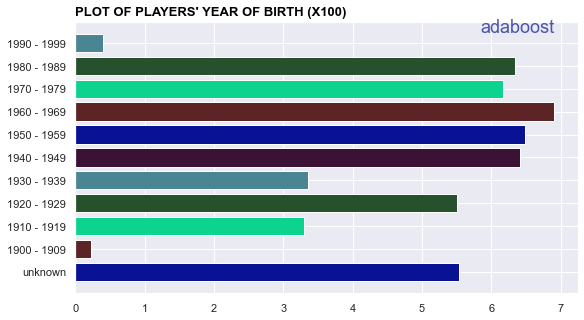

In [64]:
#y_year = 
birthYearPlot = plut(years.Years, (years.Counts.values)*0.01, 'PLOT OF PLAYERS\' YEAR OF BIRTH (X100)')

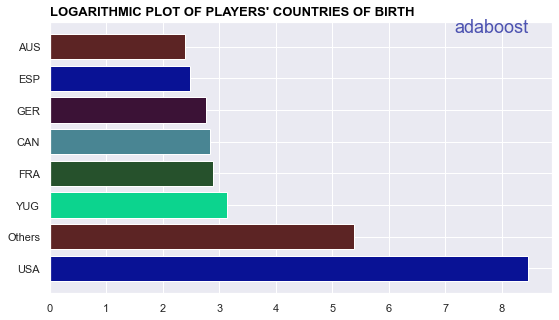

In [65]:
birthCountryplot = plut(plot2.index, np.log(plot2.values), 'LOGARITHMIC PLOT OF PLAYERS\' COUNTRIES OF BIRTH')

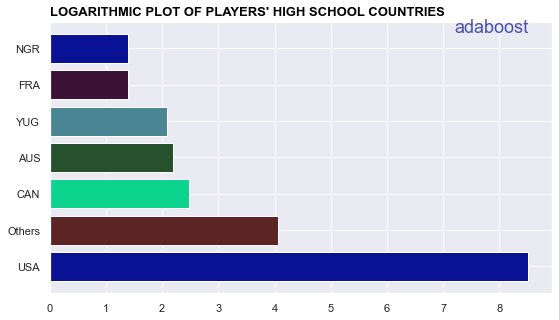

In [66]:
hsCountryplot = plut(plot3.index, np.log(plot3.values), 'LOGARITHMIC PLOT OF PLAYERS\' HIGH SCHOOL COUNTRIES')

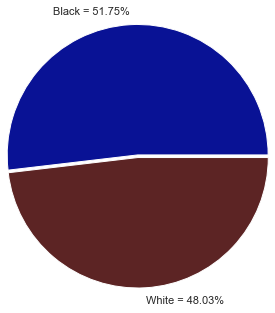

In [72]:
label = percentage[['Race', 'Percentage']].apply(lambda x : "{} = {}%".format(x[0], x[1]), axis= 1)

plt.pie(raceG, explode = [0.015, 0.015], labels= label.values, labeldistance= 1.1, colors = ['#091295', '#5c2424'], radius = 1.5)
plt.show()